# Notebook for Preliminary Data Analysis 

## Date: 2/27/2020
## Author: Sanittawan Tan

In [1]:
import lucem_illud_2020
from datetime import datetime

import numpy as np #For arrays
import scipy as sp #For some stats
import pandas as pd #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn as sns #Makes the graphics look nicer
import pyanno #On python3 make sure to pip install pyanno3

#We need to import these this way due to how pyanno is setup
from pyanno.measures import pairwise_matrix, agreement, cohens_kappa, cohens_weighted_kappa, fleiss_kappa, krippendorffs_alpha, pearsons_rho, scotts_pi, spearmans_rho
from pyanno.annotations import AnnotationsContainer
from pyanno.models import ModelA, ModelBt, ModelB

from functools import reduce
from itertools import permutations
import math

## Pre-processing

In [146]:
# read sample data
sample_tweets = pd.read_csv('./data/sample_tweets_final.csv', encoding='utf-8',
                           dtype={'coder1': 'Int64', 'coder2': 'Int64', 'coder3': 'Int64'})

In [63]:
# read full data
tweets = pd.read_csv('./data/tweets_final.csv', encoding='utf-8')

In [148]:
sample_tweets.columns

Index(['coder1', 'coder2', 'coder3', 'screen_name_tweets', 'fullname', 'text',
       'timestamp', 'following', 'followers', 'num_tweets', 'user_id_users',
       'date_joined', 'has_media', 'hashtags', 'img_urls', 'is_replied',
       'is_reply_to', 'likes', 'links', 'parent_tweet_id', 'replies',
       'reply_to_users', 'retweets', 'text_html', 'timestamp_epochs',
       'tweet_id', 'tweet_url', 'user_id_tweets', 'username', 'video_url',
       'location', 'blog', 'num_likes_users', 'lists', 'screen_name_users'],
      dtype='object')

In [149]:
# subset only useful columns
cols_to_keep = ['coder1', 'coder2', 'coder3', 'screen_name_tweets', 'fullname',
                'text', 'timestamp', 'following', 'followers', 'num_tweets',
                'date_joined', 'location', 'num_likes_users', 'user_id_users']
sample_df = sample_tweets[cols_to_keep]

In [150]:
sample_df.rename(columns={"num_likes_users": "num_likes",
                         "user_id_users": "id"}, inplace=True)

/Users/sanittawan/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [151]:
sample_df.head(2)

,coder1,coder2,coder3,screen_name_tweets,fullname,text,timestamp,following,followers,num_tweets,date_joined,location,num_likes,id
0,1,1,1,trueman98587845,trueman,สู้ๆ นะครับ เป็นกำลังใจให้ เจ้าหน้าที่ทุกคน มั...,2020-01-28 13:27:29,30.0,4.0,1032.0,5:13 PM - 22 Jan 2020,NaN,502.0,1.220152e+18
1,1,1,1,KI36bsxg8ozf6bg,ชัย สุขกายสบายใจ,เพื่อรักษา และ ระวังป้องกัน เจ้าหน้าที่รัฐ ผมด...,2020-02-03 15:58:04,36.0,22.0,2673.0,10:50 PM - 2 Dec 2019,NaN,770.0,1.201756e+18


In [152]:
sample_df.tail()

,coder1,coder2,coder3,screen_name_tweets,fullname,text,timestamp,following,followers,num_tweets,date_joined,location,num_likes,id
295,0,0,0,k0b_k0b,║ ⊙︿⊙™║,ทหารใกล้เกษียณ ถ้าอยากอยู่บ้านหลวงฟรีหลังเกษีย...,2020-02-14 5:48:45,1671.0,7025.0,109114.0,1:59 AM - 27 Jul 2009,NaN,2093.0,6.054160e+07
296,0,0,0,jssnve,NaN,พร้อมลาออก พร้อมยุบสภา เอออันนี้สนับสนุน #รัฐบ...,2020-02-13 19:14:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,0,0,0,autto002,Love Beach,เมื่อไหร่ เราจะมีระบบแจ้งเตือน ประมานว่าตอนนี้...,2020-02-14 3:08:43,212.0,164.0,93469.0,2:31 AM - 28 Aug 2009,Thailand,2046.0,6.954860e+07
298,0,0,0,GrahAnimation,Kritsana Assadong,ติดเทรนด์แถบข้างแล้ว \nเชี่ย ไอโอ ดูไว้ อันนี้...,2020-02-13 18:06:49,1888.0,145.0,2920.0,2:24 AM - 15 Aug 2018,Thailand,10527.0,1.029660e+18
299,0,0,0,eibbbb,เอิ่บ,แล้วก็จะมีสื่อโง่ๆแคปไปลง ปชชแห่ให้กำลังใจรัฐบ...,2020-02-13 18:34:06,542.0,116.0,92484.0,8:28 AM - 18 Mar 2019,NaN,133900.0,1.107665e+18


In [153]:
sample_df.dtypes

coder1                  Int64
coder2                  Int64
coder3                  Int64
screen_name_tweets     object
fullname               object
text                   object
timestamp              object
following             float64
followers             float64
num_tweets            float64
date_joined            object
location               object
num_likes             float64
id                    float64
dtype: object

In [154]:
sample_df.columns

Index(['coder1', 'coder2', 'coder3', 'screen_name_tweets', 'fullname', 'text',
       'timestamp', 'following', 'followers', 'num_tweets', 'date_joined',
       'location', 'num_likes', 'id'],
      dtype='object')

In [156]:
sample_df.loc[sample_df['coder1'].isna()]

,coder1,coder2,coder3,screen_name_tweets,fullname,text,timestamp,following,followers,num_tweets,date_joined,location,num_likes,id
136,<NA>,0,0,juleejib,juleejib,เรามี รมต.กระทรวงแรงงานไว้ทำไม #รัฐบาลเตรียมพร...,2020-02-19 11:41:59,149.0,6.0,546.0,7:35 PM - 30 Apr 2019,"Bangkok, Thailand",4045.0,1.123416e+18
157,<NA>,0,0,twentyfine2,Preset Lightroom 79฿,แต่งรูปง่ายๆด้วยคลิ๊กเดียวไม่ต้องปรับอะไร \n79...,2020-02-14 4:02:09,17.0,7.0,17.0,8:17 AM - 13 Feb 2020,NaN,9.0,1.227990e+18
292,<NA>,0,0,meVnus,V Nus,#ชิมช้อปใช้ ก็ไม่ช่วย\n\nแล้วยังอยากจะมีเฟสต่อ...,2020-02-14 7:00:53,2726.0,13611.0,165456.0,12:30 AM - 18 Aug 2009,NaN,3914.0,6.662378e+07


In [157]:
sample_df['coder1'] = np.where(sample_df['coder1'].isna(), 0, sample_df['coder1'])

/Users/sanittawan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [161]:
sample_df.loc[sample_df['coder1'].isna()]

,coder1,coder2,coder3,screen_name_tweets,fullname,text,timestamp,following,followers,num_tweets,date_joined,location,num_likes,id


In [163]:
sample_df.loc[sample_df['coder3'].isna()]

,coder1,coder2,coder3,screen_name_tweets,fullname,text,timestamp,following,followers,num_tweets,date_joined,location,num_likes,id
19,1,1,<NA>,daengbile436,แดง ไบเล่,ข่าวปลอม ไม่จริง ไม่ควรแชร์ต่อ\n#ไวรัสโคโรนา\...,2020-01-29 3:46:32,38.0,5.0,1234.0,9:12 PM - 20 Jan 2020,NaN,21.0,1.219488e+18
74,1,1,<NA>,daengbile436,แดง ไบเล่,ข่าวปลอม ไม่จริง ไม่ควรแชร์ต่อ\n#ไวรัสโคโรนา\...,2020-01-29 3:47:03,38.0,5.0,1234.0,9:12 PM - 20 Jan 2020,NaN,21.0,1.219488e+18


In [164]:
sample_df['coder3'] = np.where(sample_df['coder3'].isna(), 1, sample_df['coder3'])

/Users/sanittawan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [170]:
sample_df.loc[sample_df['coder3'].isna()]

,coder1,coder2,coder3,screen_name_tweets,fullname,text,timestamp,following,followers,num_tweets,date_joined,location,num_likes,id


In [171]:
f_sample_df = sample_df.dropna(subset=['following', 'followers', 'num_tweets', 'date_joined', 'num_likes'])

In [172]:
f_sample_df.shape # a bit smaller but still good

(275, 14)

In [173]:
types = {'coder1': 'int64', 'coder2': 'int64', 'coder3': 'int64',
        'screen_name_tweets': 'str', 'text': 'str', 'following': 'int64', 
         'followers': 'int64', 'num_tweets': 'int64', 'num_likes': 'int64', 'id': 'int64'}
f_sample_df = f_sample_df.astype(types)

In [64]:
def change_to_timestamp(s):
    if s == -1:
        return s
    new_s = s.split()
    new_s = ''.join(new_s)
    f = "%I:%M%p-%d%b%Y"
    out = datetime.strptime(new_s, f)
    out = pd.Timestamp(out)
    return out

In [175]:
f_sample_df['new_date_joined'] = f_sample_df['date_joined'].apply(change_to_timestamp)
f_sample_df['new_date_joined']

0     2020-01-22 17:13:00
1     2019-12-02 22:50:00
2     2020-01-20 21:12:00
3     2020-01-22 17:13:00
4     2019-12-23 00:14:00
              ...        
294   2018-03-25 01:18:00
295   2009-07-27 01:59:00
297   2009-08-28 02:31:00
298   2018-08-15 02:24:00
299   2019-03-18 08:28:00
Name: new_date_joined, Length: 275, dtype: datetime64[ns]

In [176]:
f_sample_df.drop(columns=['date_joined'], inplace=True)
f_sample_df.rename(columns={"new_date_joined": "date_joined"}, inplace=True)

In [177]:
f_sample_df.reset_index(drop=True, inplace=True)

In [200]:
df = pd.DataFrame({'year': [2020]*f_sample_df.shape[0],
                   'month': [2]*f_sample_df.shape[0],
                   'day': [27]*f_sample_df.shape[0]})
df = pd.to_datetime(df)

In [204]:
f_sample_df['num_days_joined'] = df - f_sample_df['date_joined']

In [211]:
f_sample_df['days_on_twitter'] = f_sample_df['num_days_joined'].apply(lambda x: x.days)

In [212]:
f_sample_df.columns

Index(['coder1', 'coder2', 'coder3', 'screen_name_tweets', 'fullname', 'text',
       'timestamp', 'following', 'followers', 'num_tweets', 'location',
       'num_likes', 'id', 'date_joined', 'num_days_joined', 'days_on_twitter'],
      dtype='object')

In [213]:
f_sample_df.iloc[0]['num_days_joined'].days

35

In [214]:
f_sample_df

,coder1,coder2,coder3,screen_name_tweets,fullname,text,timestamp,following,followers,num_tweets,location,num_likes,id,date_joined,num_days_joined,days_on_twitter
0,1,1,1,trueman98587845,trueman,สู้ๆ นะครับ เป็นกำลังใจให้ เจ้าหน้าที่ทุกคน มั...,2020-01-28 13:27:29,30,4,1032,NaN,502,1220152441666039808,2020-01-22 17:13:00,35 days 06:47:00,35
1,1,1,1,KI36bsxg8ozf6bg,ชัย สุขกายสบายใจ,เพื่อรักษา และ ระวังป้องกัน เจ้าหน้าที่รัฐ ผมด...,2020-02-03 15:58:04,36,22,2673,NaN,770,1201755584225107968,2019-12-02 22:50:00,86 days 01:10:00,86
2,1,1,1,daengbile436,แดง ไบเล่,ข่าวปลอม ไม่จริง ไม่ควรแชร์ต่อ\n#ไวรัสโคโรนา\...,2020-01-29 3:46:25,38,5,1234,NaN,21,1219487869049307136,2020-01-20 21:12:00,37 days 02:48:00,37
3,1,1,1,trueman98587845,trueman,กระผมหนึ่งในพลเมืองคนไทย ขอเป็นกำลังใจให้คุณหม...,2020-01-31 3:22:40,30,4,1032,NaN,502,1220152441666039808,2020-01-22 17:13:00,35 days 06:47:00,35
4,1,1,1,thaiprong,รวมใจไทยปรองดอง,ขอร้องทุกคนช่วยเสพสื่ออย่างมีสติ อย่าแชร์ข่าวป...,2020-01-28 8:28:56,304,99,78,NaN,395,1209024400651014144,2019-12-23 00:14:00,65 days 23:46:00,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0,0,0,OlesRay124,OlesQG,ถ้ายังมั่นใจว่าประเทศไทยคือระบอบประชาธิปไตย คว...,2020-02-14 2:41:59,15,9,178,"อ.สามพราน, จ.นครปฐม",164,977822121308053504,2018-03-25 01:18:00,703 days 22:42:00,703
271,0,0,0,k0b_k0b,║ ⊙︿⊙™║,ทหารใกล้เกษียณ ถ้าอยากอยู่บ้านหลวงฟรีหลังเกษีย...,2020-02-14 5:48:45,1671,7025,109114,NaN,2093,60541604,2009-07-27 01:59:00,3866 days 22:01:00,3866
272,0,0,0,autto002,Love Beach,เมื่อไหร่ เราจะมีระบบแจ้งเตือน ประมานว่าตอนนี้...,2020-02-14 3:08:43,212,164,93469,Thailand,2046,69548600,2009-08-28 02:31:00,3834 days 21:29:00,3834
273,0,0,0,GrahAnimation,Kritsana Assadong,ติดเทรนด์แถบข้างแล้ว \nเชี่ย ไอโอ ดูไว้ อันนี้...,2020-02-13 18:06:49,1888,145,2920,Thailand,10527,1029660114158989312,2018-08-15 02:24:00,560 days 21:36:00,560


In [215]:
f_sample_df.to_csv('sample_tweets_inter.csv', index=False, encoding='utf-8')

## Summary Statistics

In [2]:
# start running from this line

#### Full train set

In [14]:
full_train_df = pd.read_csv('./data/full_train_set.csv', encoding='utf-8')

train_df = pd.read_csv('./data/sample_train_set.csv', encoding='utf-8')
test_df = pd.read_csv('./data/sample_test_set.csv', encoding='utf-8')

In [15]:
filtered_full_train_df = full_train_df[['following', 'followers', 'num_tweets', 'num_likes', 'days_on_twitter', 'is_IO']]

In [16]:
sum_stats = filtered_full_train_df.describe().round(2)

In [17]:
sum_stats

,following,followers,num_tweets,num_likes,days_on_twitter,is_IO
count,275.00,275.00,275.00,275.00,275.00,275.00
mean,264.09,535.35,18253.16,6175.05,856.79,0.39
std,439.55,3077.94,48824.80,25516.17,1161.32,0.49
min,1.00,1.00,11.00,1.00,13.00,0.00
25%,35.00,4.00,493.00,225.00,37.00,0.00
50%,104.00,19.00,1234.00,502.00,302.00,0.00
75%,302.00,99.00,7308.50,3703.50,1165.50,1.00
max,2726.00,29081.00,393236.00,326831.00,3974.00,1.00


In [28]:
print(sum_stats.to_latex(index=True))

\begin{tabular}{lrrrrrr}
\toprule
{} &  following &  followers &  num\_tweets &  num\_likes &  days\_on\_twitter &   is\_IO \\
\midrule
count &     275.00 &     275.00 &      275.00 &     275.00 &           275.00 &  275.00 \\
mean  &     264.09 &     535.35 &    18253.16 &    6175.05 &           856.79 &    0.39 \\
std   &     439.55 &    3077.94 &    48824.80 &   25516.17 &          1161.32 &    0.49 \\
min   &       1.00 &       1.00 &       11.00 &       1.00 &            13.00 &    0.00 \\
25\%   &      35.00 &       4.00 &      493.00 &     225.00 &            37.00 &    0.00 \\
50\%   &     104.00 &      19.00 &     1234.00 &     502.00 &           302.00 &    0.00 \\
75\%   &     302.00 &      99.00 &     7308.50 &    3703.50 &          1165.50 &    1.00 \\
max   &    2726.00 &   29081.00 &   393236.00 &  326831.00 &          3974.00 &    1.00 \\
\bottomrule
\end{tabular}



In [26]:
mean_by_class = filtered_full_train_df.groupby('is_IO').mean().round(2)
mean_by_class

,following,followers,num_tweets,num_likes,days_on_twitter
is_IO,,,,,
0,378.54,862.45,29070.46,9810.58,1348.82
1,81.61,13.85,1006.73,378.77,72.32


In [27]:
print(mean_by_class.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  following &  followers &  num\_tweets &  num\_likes &  days\_on\_twitter \\
is\_IO &            &            &             &            &                  \\
\midrule
0     &     378.54 &     862.45 &    29070.46 &    9810.58 &          1348.82 \\
1     &      81.61 &      13.85 &     1006.73 &     378.77 &            72.32 \\
\bottomrule
\end{tabular}



In [29]:
filtered_train = train_df[['following', 'followers', 'num_tweets', 'num_likes', 'days_on_twitter', 'is_IO']]
filtered_test = test_df[['following', 'followers', 'num_tweets', 'num_likes', 'days_on_twitter', 'is_IO']]

In [33]:
desc_train = filtered_train.groupby('is_IO').mean().round(2)
desc_train

,following,followers,num_tweets,num_likes,days_on_twitter
is_IO,,,,,
0,390.02,909.08,33299.06,11067.52,1311.70
1,73.16,14.44,1032.81,372.91,73.68


In [35]:
print(desc_train.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  following &  followers &  num\_tweets &  num\_likes &  days\_on\_twitter \\
is\_IO &            &            &             &            &                  \\
\midrule
0     &     390.02 &     909.08 &    33299.06 &   11067.52 &          1311.70 \\
1     &      73.16 &      14.44 &     1032.81 &     372.91 &            73.68 \\
\bottomrule
\end{tabular}



In [34]:
desc_test = filtered_test.groupby('is_IO').mean().round(2)
desc_test

,following,followers,num_tweets,num_likes,days_on_twitter
is_IO,,,,,
0,352.00,754.55,19286.63,6902.37,1434.71
1,102.06,12.42,943.61,392.97,69.03


In [36]:
print(desc_test.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  following &  followers &  num\_tweets &  num\_likes &  days\_on\_twitter \\
is\_IO &            &            &             &            &                  \\
\midrule
0     &     352.00 &     754.55 &    19286.63 &    6902.37 &          1434.71 \\
1     &     102.06 &      12.42 &      943.61 &     392.97 &            69.03 \\
\bottomrule
\end{tabular}



In [94]:
f_sample_df.groupby('is_IO')['following'].describe()

,count,mean,std,min,25%,50%,75%,max
is_IO,,,,,,,,
0,169.0,378.544379,526.052018,1.0,55.0,179.0,413.0,2726.0
1,106.0,81.613208,81.912098,30.0,30.0,36.0,86.0,304.0


In [95]:
f_sample_df.groupby('is_IO')['followers'].describe()

,count,mean,std,min,25%,50%,75%,max
is_IO,,,,,,,,
0,169.0,862.449704,3895.060975,1.0,11.0,53.0,213.0,29081.0
1,106.0,13.849057,25.309811,2.0,4.0,4.0,5.0,99.0


In [96]:
f_sample_df.groupby('is_IO')['num_tweets'].describe()

,count,mean,std,min,25%,50%,75%,max
is_IO,,,,,,,,
0,169.0,29070.455621,59851.319856,11.0,588.0,4305.0,20453.0,393236.0
1,106.0,1006.726415,803.602799,28.0,493.0,1032.0,1234.0,2673.0


In [97]:
f_sample_df.groupby('is_IO')['days_on_twitter'].describe()

,count,mean,std,min,25%,50%,75%,max
is_IO,,,,,,,,
0,169.0,1348.822485,1245.525813,13.0,341.0,932.0,2180.0,3974.0
1,106.0,72.320755,162.320292,14.0,35.0,35.0,65.0,1009.0


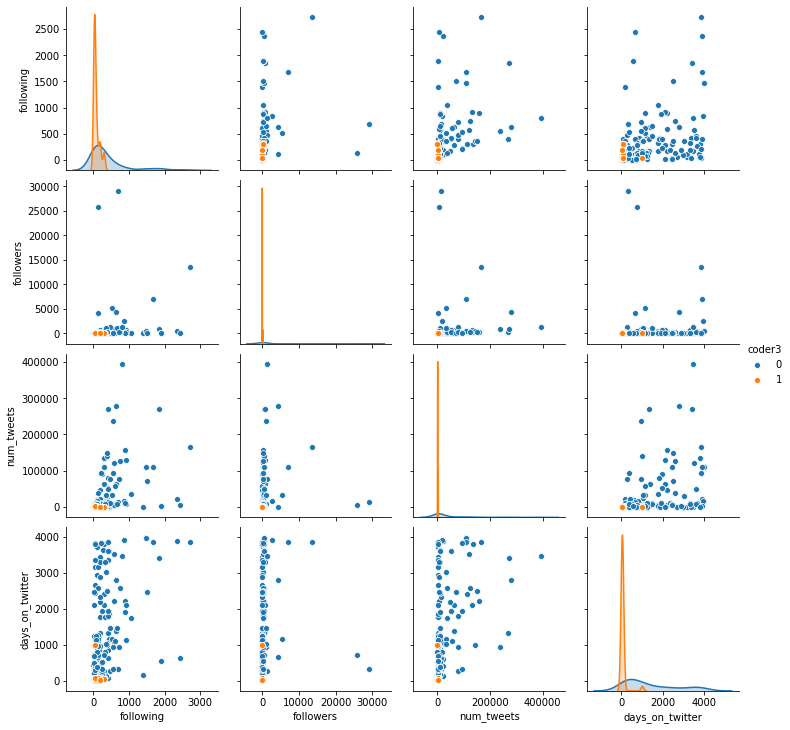

In [98]:
sns.pairplot(f_sample_df[['coder3', 'following', 'followers', 'num_tweets', 'days_on_twitter']], hue="coder3");
plt.savefig('./graphics/pairplots.png', dpi=300)

## Inter-coder reliability

In [13]:
f_sample_df = pd.read_csv('./data/sample_tweets_inter.csv', encoding='utf-8',
                           dtype={'coder1': 'Int64', 'coder2': 'Int64', 'coder3': 'Int64'})

In [4]:
anno = AnnotationsContainer.from_array(f_sample_df.iloc[:, 0:3].to_numpy(), missing_values=[-1])
anno.annotations

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [0, 0, 1],
       [1, 1, 1],
       [0, 1, 1],
       [0, 1, 1],
       [0, 0, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [0, 0, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [0, 0, 1],
       [1, 1, 1],
       [1, 0, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 0, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1,

In [5]:
fleiss_kappa(anno.annotations[::])

0.9384496779488201

In [6]:
def pairwise_metric_average(metric, array):
    """Calculate the pairwise metric average for the real elements of metric function run on an array of annotations"""
    p = permutations(range(array[0,:].size),2)
    m = [metric(array[:,x[0]], array[:,x[1]]) for x in p]
    clean_m = [c for c in m if not math.isnan(c)]
    return reduce(lambda a, b: a + b, clean_m)/len(clean_m)    

In [7]:
pairwise_metric_average(cohens_kappa, anno.annotations)

0.9384659163794801

Annotation statistics both tell us that there's a high inter-coder reliability (93.8%)

### Use Model B with $\theta$

In [8]:
model2 = ModelBt.create_initial_state(2, 3)
print(model2.theta)
print(model2.log_likelihood(anno.annotations))

[0.62316365 0.65155246 0.68533444]
-500.9877540761749


In [9]:
model2.map(anno.annotations)
print(model2.theta)
print(model2.log_likelihood(anno.annotations))

[0.98153048 0.98922409 0.98495604]
-245.539845906971


In [10]:
posterior2 = model2.infer_labels(anno.annotations)
print(posterior2)

[[5.00258718e-06 9.99994997e-01]
 [5.00258718e-06 9.99994997e-01]
 [5.00258718e-06 9.99994997e-01]
 [5.00258718e-06 9.99994997e-01]
 [5.00258718e-06 9.99994997e-01]
 [5.00258718e-06 9.99994997e-01]
 [5.00258718e-06 9.99994997e-01]
 [5.00258718e-06 9.99994997e-01]
 [5.00258718e-06 9.99994997e-01]
 [5.00258718e-06 9.99994997e-01]
 [5.00258718e-06 9.99994997e-01]
 [9.91671009e-01 8.32899066e-03]
 [5.00258718e-06 9.99994997e-01]
 [1.39315836e-02 9.86068416e-01]
 [1.39315836e-02 9.86068416e-01]
 [9.91671009e-01 8.32899066e-03]
 [5.00258718e-06 9.99994997e-01]
 [5.00258718e-06 9.99994997e-01]
 [5.00258718e-06 9.99994997e-01]
 [5.00258718e-06 9.99994997e-01]
 [5.00258718e-06 9.99994997e-01]
 [5.00258718e-06 9.99994997e-01]
 [9.91671009e-01 8.32899066e-03]
 [5.00258718e-06 9.99994997e-01]
 [5.00258718e-06 9.99994997e-01]
 [5.00258718e-06 9.99994997e-01]
 [5.00258718e-06 9.99994997e-01]
 [5.00258718e-06 9.99994997e-01]
 [5.00258718e-06 9.99994997e-01]
 [5.00258718e-06 9.99994997e-01]
 [9.916710

In [11]:
votes = []
for r in anno.annotations:
    v = [0] * len(anno.labels)
    votes.append(v)
    for a in r:
        if a > -1:
            v[a] += 1
votes_array = np.array(votes)

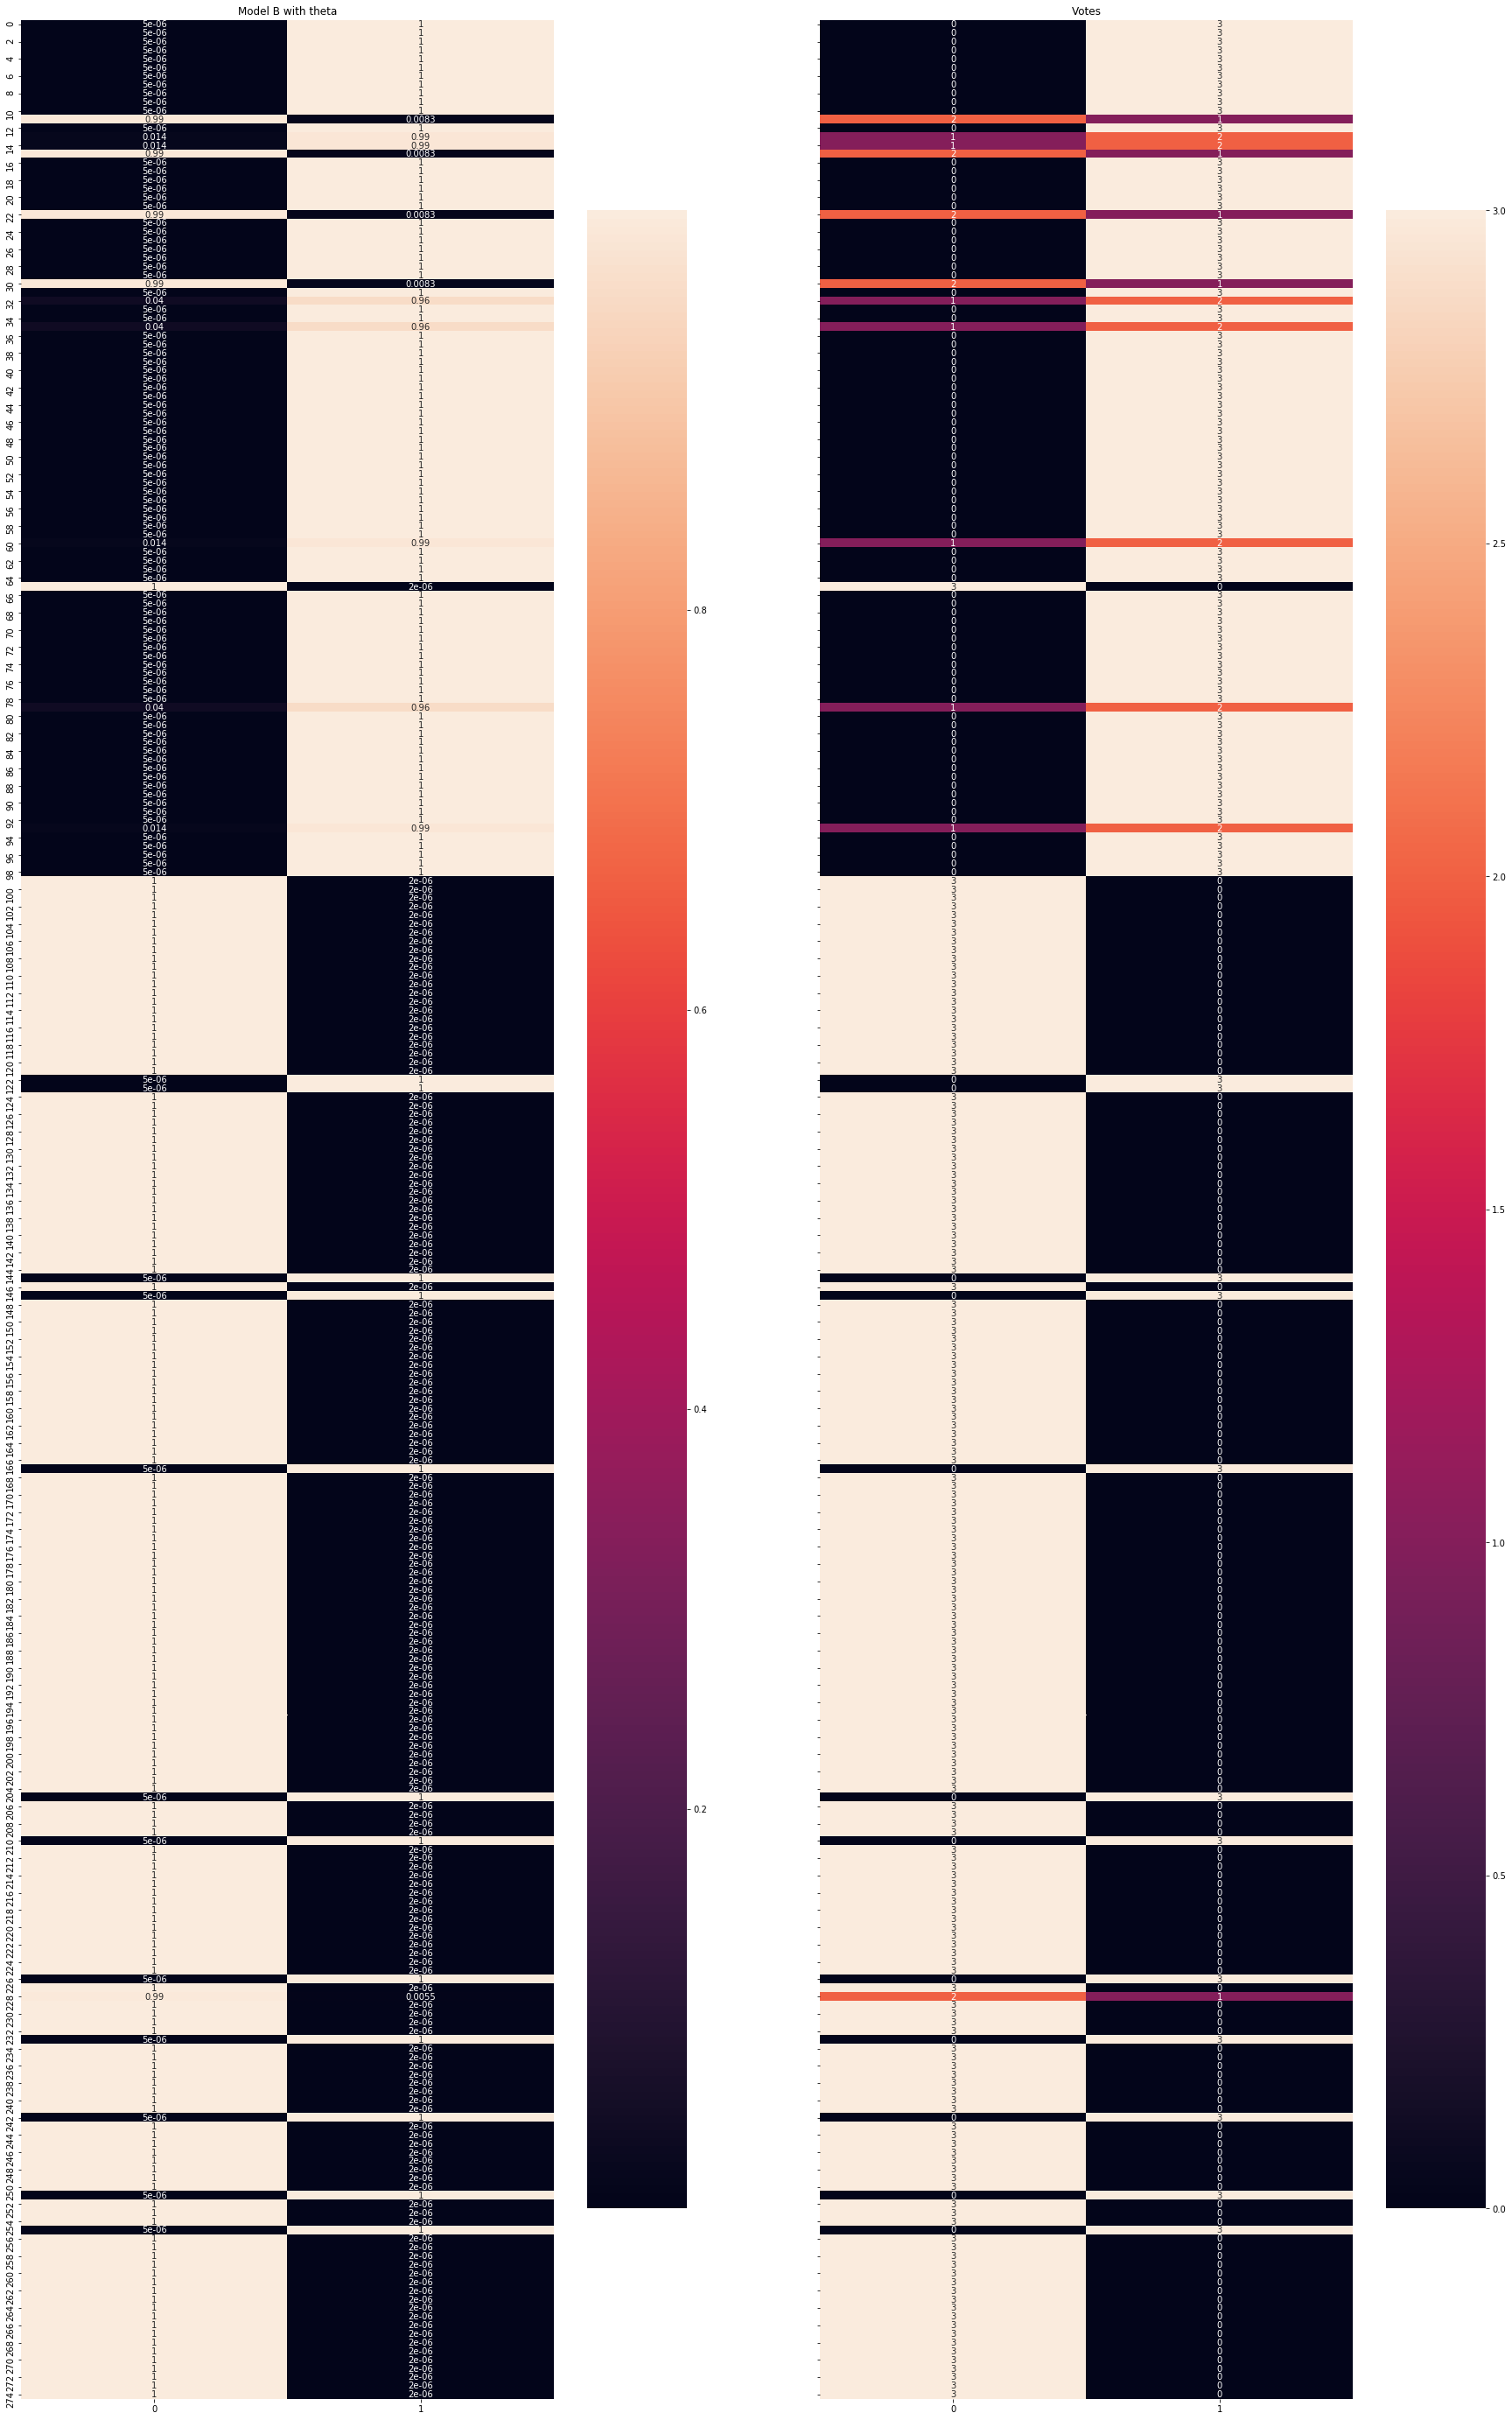

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (30, 50), sharey=True)
num_questions = f_sample_df.shape[0]

sns.heatmap(votes_array[:num_questions], annot = True, ax=ax2)
sns.heatmap(posterior2[:num_questions], annot=True, ax =ax1)
ax1.set_title("Model B with theta")
ax2.set_title("Votes")
plt.savefig('./graphics/modelbtheta.png', dpi=300)
plt.show()

In [14]:
posterior2

array([[5.00258718e-06, 9.99994997e-01],
       [5.00258718e-06, 9.99994997e-01],
       [5.00258718e-06, 9.99994997e-01],
       [5.00258718e-06, 9.99994997e-01],
       [5.00258718e-06, 9.99994997e-01],
       [5.00258718e-06, 9.99994997e-01],
       [5.00258718e-06, 9.99994997e-01],
       [5.00258718e-06, 9.99994997e-01],
       [5.00258718e-06, 9.99994997e-01],
       [5.00258718e-06, 9.99994997e-01],
       [5.00258718e-06, 9.99994997e-01],
       [9.91671009e-01, 8.32899066e-03],
       [5.00258718e-06, 9.99994997e-01],
       [1.39315836e-02, 9.86068416e-01],
       [1.39315836e-02, 9.86068416e-01],
       [9.91671009e-01, 8.32899066e-03],
       [5.00258718e-06, 9.99994997e-01],
       [5.00258718e-06, 9.99994997e-01],
       [5.00258718e-06, 9.99994997e-01],
       [5.00258718e-06, 9.99994997e-01],
       [5.00258718e-06, 9.99994997e-01],
       [5.00258718e-06, 9.99994997e-01],
       [9.91671009e-01, 8.32899066e-03],
       [5.00258718e-06, 9.99994997e-01],
       [5.002587

In [29]:
label = []
for row in range(len(posterior2)):
    if posterior2[row, 0] < posterior2[row, 1]:
        label.append(1)
    else:
        label.append(0)

In [30]:
len(label)

275

In [32]:
f_sample_df['is_IO'] = pd.Series(label).values

In [33]:
f_sample_df

,coder1,coder2,coder3,screen_name_tweets,fullname,text,timestamp,following,followers,num_tweets,location,num_likes,id,date_joined,num_days_joined,days_on_twitter,is_IO
0,1,1,1,trueman98587845,trueman,สู้ๆ นะครับ เป็นกำลังใจให้ เจ้าหน้าที่ทุกคน มั...,2020-01-28 13:27:29,30,4,1032,NaN,502,1220152441666039808,2020-01-22 17:13:00,35 days 06:47:00.000000000,35,1
1,1,1,1,KI36bsxg8ozf6bg,ชัย สุขกายสบายใจ,เพื่อรักษา และ ระวังป้องกัน เจ้าหน้าที่รัฐ ผมด...,2020-02-03 15:58:04,36,22,2673,NaN,770,1201755584225107968,2019-12-02 22:50:00,86 days 01:10:00.000000000,86,1
2,1,1,1,daengbile436,แดง ไบเล่,ข่าวปลอม ไม่จริง ไม่ควรแชร์ต่อ\n#ไวรัสโคโรนา\...,2020-01-29 3:46:25,38,5,1234,NaN,21,1219487869049307136,2020-01-20 21:12:00,37 days 02:48:00.000000000,37,1
3,1,1,1,trueman98587845,trueman,กระผมหนึ่งในพลเมืองคนไทย ขอเป็นกำลังใจให้คุณหม...,2020-01-31 3:22:40,30,4,1032,NaN,502,1220152441666039808,2020-01-22 17:13:00,35 days 06:47:00.000000000,35,1
4,1,1,1,thaiprong,รวมใจไทยปรองดอง,ขอร้องทุกคนช่วยเสพสื่ออย่างมีสติ อย่าแชร์ข่าวป...,2020-01-28 8:28:56,304,99,78,NaN,395,1209024400651014144,2019-12-23 00:14:00,65 days 23:46:00.000000000,65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0,0,0,OlesRay124,OlesQG,ถ้ายังมั่นใจว่าประเทศไทยคือระบอบประชาธิปไตย คว...,2020-02-14 2:41:59,15,9,178,"อ.สามพราน, จ.นครปฐม",164,977822121308053504,2018-03-25 01:18:00,703 days 22:42:00.000000000,703,0
271,0,0,0,k0b_k0b,║ ⊙︿⊙™║,ทหารใกล้เกษียณ ถ้าอยากอยู่บ้านหลวงฟรีหลังเกษีย...,2020-02-14 5:48:45,1671,7025,109114,NaN,2093,60541604,2009-07-27 01:59:00,3866 days 22:01:00.000000000,3866,0
272,0,0,0,autto002,Love Beach,เมื่อไหร่ เราจะมีระบบแจ้งเตือน ประมานว่าตอนนี้...,2020-02-14 3:08:43,212,164,93469,Thailand,2046,69548600,2009-08-28 02:31:00,3834 days 21:29:00.000000000,3834,0
273,0,0,0,GrahAnimation,Kritsana Assadong,ติดเทรนด์แถบข้างแล้ว \nเชี่ย ไอโอ ดูไว้ อันนี้...,2020-02-13 18:06:49,1888,145,2920,Thailand,10527,1029660114158989312,2018-08-15 02:24:00,560 days 21:36:00.000000000,560,0


In [ ]:
# make a training and test set

In [34]:
f_sample_df.groupby('is_IO').describe()

coder1                                              coder2            \
       count      mean       std  min  25%  50%  75%  max  count      mean   
is_IO                                                                        
0      169.0  0.005917  0.076923  0.0  0.0  0.0  0.0  1.0  169.0  0.000000   
1      106.0  0.962264  0.191462  0.0  1.0  1.0  1.0  1.0  106.0  0.971698   

       ...            id               days_on_twitter               \
       ...           75%           max           count         mean   
is_IO  ...                                                            
0      ...  1.109310e+18  1.227990e+18           169.0  1348.822485   
1      ...  1.220152e+18  1.227765e+18           106.0    72.320755   

                                                        
               std   min    25%    50%     75%     max  
is_IO                                                   
0      1245.525813  13.0  341.0  932.0  2180.0  3974.0  
1       162.320292  14.0   35.0   35.0    65.0  1009.0  

[2 rows x 72 columns]

In [39]:
test_set = f_sample_df.sample(frac=0.3, replace=False, random_state=27)

In [41]:
test_set.groupby('is_IO').describe()

coder1                                    coder2       ...  \
       count mean  std  min  25%  50%  75%  max  count mean  ...   
is_IO                                                        ...   
0       51.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   51.0  0.0  ...   
1       31.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   31.0  1.0  ...   

                 id               days_on_twitter                            \
                75%           max           count         mean          std   
is_IO                                                                         
0      1.100507e+18  1.221056e+18            51.0  1434.705882  1182.030969   
1      1.225975e+18  1.227765e+18            31.0    69.032258   176.046676   

                                            
        min    25%     50%     75%     max  
is_IO                                       
0      32.0  365.0  1221.0  2024.0  3898.0  
1      14.0   19.0    35.0    53.0  1009.0  

[2 rows x 72 columns]

In [42]:
test_set.to_csv('./data/sample_test_set.csv', index=False, encoding='utf-8')

In [49]:
rows_to_drop = list(test_set.index)
print(rows_to_drop)
train_set = f_sample_df.drop(rows_to_drop, axis='index')

[125, 216, 140, 245, 183, 205, 48, 223, 212, 59, 242, 63, 5, 101, 139, 227, 115, 168, 237, 211, 180, 119, 148, 116, 171, 54, 236, 10, 70, 147, 193, 8, 120, 129, 65, 175, 137, 58, 123, 49, 233, 74, 69, 232, 202, 88, 38, 143, 186, 229, 37, 190, 156, 188, 110, 164, 21, 246, 61, 243, 9, 134, 145, 172, 27, 261, 12, 109, 18, 169, 165, 217, 208, 121, 210, 219, 122, 214, 161, 40, 78, 235]


In [55]:
train_set.reset_index(drop=True, inplace=True)

In [56]:
train_set.to_csv('./data/sample_train_set.csv', index=False, encoding='utf-8')

In [57]:
train_set.groupby('is_IO').describe()

coder1                                              coder2        ...  \
       count      mean       std  min  25%  50%  75%  max  count  mean  ...   
is_IO                                                                   ...   
0      118.0  0.008475  0.092057  0.0  0.0  0.0  0.0  1.0  118.0  0.00  ...   
1       75.0  0.946667  0.226210  0.0  1.0  1.0  1.0  1.0   75.0  0.96  ...   

                 id               days_on_twitter                           \
                75%           max           count        mean          std   
is_IO                                                                        
0      1.110201e+18  1.227990e+18           118.0  1311.70339  1275.092042   
1      1.220152e+18  1.227765e+18            75.0    73.68000   157.526502   

                                            
        min    25%    50%      75%     max  
is_IO                                       
0      13.0  338.5  762.0  2382.75  3974.0  
1      14.0   35.0   37.0    65.00  1009.0  

[2 rows x 72 columns]

In [60]:
print(118/193)
print(75/193)

0.6113989637305699
0.38860103626943004


## Training a classifier

In [2]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression as Logit
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.linear_model import RidgeClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import time

In [28]:
f_sample_df = pd.read_csv('./data/sample_train_set.csv', encoding='utf-8')
print(f_sample_df.shape)

(193, 17)


In [29]:
test_df = pd.read_csv('./data/sample_test_set.csv', encoding='utf-8')
print(test_df.shape)

(82, 17)


In [30]:
f_sample_df.columns

Index(['coder1', 'coder2', 'coder3', 'screen_name_tweets', 'fullname', 'text',
       'timestamp', 'following', 'followers', 'num_tweets', 'location',
       'num_likes', 'id', 'date_joined', 'num_days_joined', 'days_on_twitter',
       'is_IO'],
      dtype='object')

In [31]:
features = ['following', 'followers', 'num_tweets', 'num_likes', 'days_on_twitter']
target = 'is_IO'

In [32]:
X = f_sample_df[features]
y = f_sample_df[target]

In [33]:
def calc_accu_score(model, X_train_df, y_train_df):
    score = (np.mean(cross_val_score(model, X_train_df, y_train_df,
                                                scoring='accuracy', cv=5)))
    print("The 5-fold CV accuracy score of the model is {:.3f}".format(score))
    return score

### Logistic Regression as a base line

In [34]:
lgt = Logit(solver='liblinear')
lgt_model = lgt.fit(X, y)
lgt_accu_score = calc_accu_score(lgt_model, X, y)

The 5-fold CV accuracy score of the model is 0.699


In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import summary_table

# actually get the logistic result to look at the variables
X = sm.add_constant(X)
logit_model = sm.Logit(y, X)
logit_model_result = logit_model.fit()
print(logit_model_result.summary())

Optimization terminated successfully.
         Current function value: 0.288973
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                  is_IO   No. Observations:                  193
Model:                          Logit   Df Residuals:                      187
Method:                           MLE   Df Model:                            5
Date:                Thu, 12 Mar 2020   Pseudo R-squ.:                  0.5675
Time:                        13:44:28   Log-Likelihood:                -55.772
converged:                       True   LL-Null:                       -128.95
Covariance Type:            nonrobust   LLR p-value:                 7.985e-30
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.0152      0.414      4.867      0.000       1.204       2.827
following    

In [89]:
print(logit_model_result.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &      is\_IO      & \textbf{  No. Observations:  } &      275    \\
\textbf{Model:}            &      Logit       & \textbf{  Df Residuals:      } &      269    \\
\textbf{Method:}           &       MLE        & \textbf{  Df Model:          } &        5    \\
\textbf{Date:}             & Thu, 27 Feb 2020 & \textbf{  Pseudo R-squ.:     } &   0.5740    \\
\textbf{Time:}             &     22:18:11     & \textbf{  Log-Likelihood:    } &   -78.092   \\
\textbf{converged:}        &       True       & \textbf{  LL-Null:           } &   -183.33   \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                           & \textbf{coef} & \textbf{std err} & \textbf{z} & \textbf{P$> |$z$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{const}             &       2.1357  &        0.333     &     6.418  &         0.000        &        1.483    &        2.788     \\
\textbf{following}         &      -0.0021  

### Gaussian Naive Bayes

In [11]:
# assume that features follow normal distribution
gnb = GNB()
gnb_model = gnb.fit(X, y)
gnb_accu_score = calc_accu_score(gnb_model, X, y)

The 5-fold CV accuracy score of the model is 0.819


### k-Nearest Neighbor Classifier

In [12]:
knn_param_grid = {'n_neighbors': [5, 10, 15, 20, 25],
                  'weights': ['uniform', 'distance'],
                  'p': [1, 2, 3, 4, 5]}
# p = 1 = manhattan distance
# p = 2 = Euclidean distance
# p >= 3 = Minkowski

In [13]:
tic = time.time()
knn = KNN()
knn_gs = GridSearchCV(knn, knn_param_grid, cv=5,
                             scoring='accuracy', n_jobs=-1,
                             iid=False, return_train_score=True)
knn_gs.fit(X, y)
toc = time.time()
print("Time elapsed: {:.3f} seconds".format(toc - tic))

Time elapsed: 1.525 seconds


In [14]:
print('Best hyperparameter setting for KNN is {}'.format(knn_gs.best_params_))
print('5-fold accuracy score is {:.3f}'.format(knn_gs.best_score_))

Best hyperparameter setting for KNN is {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
5-fold accuracy score is 0.907


### XGBoost

In [15]:
import xgboost as xgb

In [35]:
param_grid = {
        'silent': [True],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100, 500]}

In [36]:
clf = xgb.XGBClassifier()
xgb_clf = RandomizedSearchCV(clf, param_grid, n_iter=20,
                            n_jobs=1, verbose=1, cv=5,
                            scoring='accuracy', refit=True, random_state=42)
print("Randomized search..")
search_time_start = time.time()
xgb_clf.fit(X, y)
print("Randomized search time:", time.time() - search_time_start, "seconds")

Randomized search..
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Randomized search time: 1.4886279106140137 seconds


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


In [37]:
print('Best hyperparameter setting for Boosting is {}'.format(xgb_clf.best_params_))
print('5-fold accuracy score is {:.3f}'.format(xgb_clf.best_score_))

Best hyperparameter setting for Boosting is {'subsample': 0.9, 'silent': True, 'reg_lambda': 1.0, 'n_estimators': 500, 'min_child_weight': 0.5, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.8}
5-fold accuracy score is 0.969


## Test against test set

In [38]:
X_test = test_df[features]
y_test = test_df[target]

In [39]:
# train
final_model = xgb_clf.best_estimator_

In [40]:
final_model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bytree=1.0, gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=15, min_child_weight=0.5,
              missing=None, n_estimators=500, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1.0, scale_pos_weight=1, seed=None, silent=True,
              subsample=0.9)

In [41]:
y_pred = final_model.predict(X_test)

In [43]:
y_prob = final_model.predict_proba(X_test)
y_prob

array([[9.9943542e-01, 5.6456280e-04],
       [9.9914807e-01, 8.5191295e-04],
       [9.9951208e-01, 4.8791504e-04],
       [9.9980336e-01, 1.9663604e-04],
       [9.9943542e-01, 5.6456280e-04],
       [4.8112869e-03, 9.9518871e-01],
       [1.9226462e-01, 8.0773538e-01],
       [9.9950850e-01, 4.9147726e-04],
       [9.9943542e-01, 5.6456280e-04],
       [2.0154715e-03, 9.9798453e-01],
       [4.8112869e-03, 9.9518871e-01],
       [5.5364418e-01, 4.4635582e-01],
       [1.0293722e-03, 9.9897063e-01],
       [9.9891311e-01, 1.0868821e-03],
       [9.9943542e-01, 5.6456280e-04],
       [9.9943542e-01, 5.6456280e-04],
       [9.9943542e-01, 5.6456280e-04],
       [2.4316251e-02, 9.7568375e-01],
       [8.2650435e-01, 1.7349562e-01],
       [9.9978846e-01, 2.1155005e-04],
       [9.2720020e-01, 7.2799802e-02],
       [9.9765515e-01, 2.3448239e-03],
       [9.9923259e-01, 7.6741126e-04],
       [9.9947435e-01, 5.2565226e-04],
       [9.9978095e-01, 2.1902734e-04],
       [6.8599343e-02, 9.

In [44]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.975609756097561


We got really a good test set accuracy score of 98%. I will go with XGBoost as my metadata classifier. Next, generate predicted probabilities for the entire training set and will use that as a feature in a deep learning model.

In [50]:
full_train_set = pd.concat([f_sample_df, test_df])

In [51]:
full_train_set.head(2)

,coder1,coder2,coder3,screen_name_tweets,fullname,text,timestamp,following,followers,num_tweets,location,num_likes,id,date_joined,num_days_joined,days_on_twitter,is_IO
0,1,1,1,trueman98587845,trueman,สู้ๆ นะครับ เป็นกำลังใจให้ เจ้าหน้าที่ทุกคน มั...,2020-01-28 13:27:29,30,4,1032,NaN,502,1220152441666039808,2020-01-22 17:13:00,35 days 06:47:00.000000000,35,1
1,1,1,1,KI36bsxg8ozf6bg,ชัย สุขกายสบายใจ,เพื่อรักษา และ ระวังป้องกัน เจ้าหน้าที่รัฐ ผมด...,2020-02-03 15:58:04,36,22,2673,NaN,770,1201755584225107968,2019-12-02 22:50:00,86 days 01:10:00.000000000,86,1


In [52]:
features = ['following', 'followers', 'num_tweets', 'num_likes', 'days_on_twitter']
target = 'is_IO'

In [53]:
X_full_train = full_train_set[features]
y_full_train = full_train_set[target]

In [58]:
y_full_train

0     1
1     1
2     1
3     1
4     1
     ..
77    0
78    0
79    1
80    1
81    0
Name: is_IO, Length: 275, dtype: int64

In [54]:
final_model.fit(X_full_train, y_full_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bytree=1.0, gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=15, min_child_weight=0.5,
              missing=None, n_estimators=500, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1.0, scale_pos_weight=1, seed=None, silent=True,
              subsample=0.9)

In [59]:
full_y_pred = final_model.predict(X_full_train)
full_y_prob = final_model.predict_proba(X_full_train)

In [60]:
full_accuracy = accuracy_score(y_full_train, full_y_pred)

In [61]:
full_accuracy

0.9890909090909091

In [127]:
full_train_set['IO_meta_clf'] = full_y_pred

In [128]:
full_train_set['isIO_meta_prob'] = full_y_prob[:,1]

In [131]:
full_train_set.head(5)

,coder1,coder2,coder3,screen_name_tweets,fullname,text,timestamp,following,followers,num_tweets,location,num_likes,id,date_joined,num_days_joined,days_on_twitter,is_IO,IO_meta_clf,isIO_meta_prob
0,1,1,1,trueman98587845,trueman,สู้ๆ นะครับ เป็นกำลังใจให้ เจ้าหน้าที่ทุกคน มั...,2020-01-28 13:27:29,30,4,1032,NaN,502,1220152441666039808,2020-01-22 17:13:00,35 days 06:47:00.000000000,35,1,1,0.999324
1,1,1,1,KI36bsxg8ozf6bg,ชัย สุขกายสบายใจ,เพื่อรักษา และ ระวังป้องกัน เจ้าหน้าที่รัฐ ผมด...,2020-02-03 15:58:04,36,22,2673,NaN,770,1201755584225107968,2019-12-02 22:50:00,86 days 01:10:00.000000000,86,1,1,0.994460
2,1,1,1,daengbile436,แดง ไบเล่,ข่าวปลอม ไม่จริง ไม่ควรแชร์ต่อ\n#ไวรัสโคโรนา\...,2020-01-29 3:46:25,38,5,1234,NaN,21,1219487869049307136,2020-01-20 21:12:00,37 days 02:48:00.000000000,37,1,1,0.998803
3,1,1,1,trueman98587845,trueman,กระผมหนึ่งในพลเมืองคนไทย ขอเป็นกำลังใจให้คุณหม...,2020-01-31 3:22:40,30,4,1032,NaN,502,1220152441666039808,2020-01-22 17:13:00,35 days 06:47:00.000000000,35,1,1,0.999324
4,1,1,1,thaiprong,รวมใจไทยปรองดอง,ขอร้องทุกคนช่วยเสพสื่ออย่างมีสติ อย่าแชร์ข่าวป...,2020-01-28 8:28:56,304,99,78,NaN,395,1209024400651014144,2019-12-23 00:14:00,65 days 23:46:00.000000000,65,1,1,0.991488


In [132]:
# this is the subset of data that is used to 
# generate the metadata classifier
full_train_set.to_csv('./data/full_train_set.csv', index=False, encoding='utf-8')

In [ ]:
# read the above file and train the model to get the final model

## Generate predicted probabilities on the full data set

In [65]:
# read full data
tweets = pd.read_csv('./data/tweets_final.csv', encoding='utf-8')

In [66]:
tweets.columns

Index(['has_media', 'hashtags', 'img_urls', 'is_replied', 'is_reply_to',
       'likes', 'links', 'parent_tweet_id', 'replies', 'reply_to_users',
       'retweets', 'screen_name', 'text', 'text_html', 'timestamp',
       'timestamp_epochs', 'tweet_id', 'tweet_url', 'id', 'username',
       'video_url', 'fullname', 'location', 'blog', 'num_tweets', 'following',
       'followers', 'num_likes', 'lists', 'date_joined'],
      dtype='object')

In [67]:
# subset only useful columns
cols_to_keep = ['screen_name', 'fullname',
                'text', 'timestamp', 'following', 'followers', 'num_tweets',
                'date_joined', 'location', 'likes', 'id']
filtered_tweets = tweets[cols_to_keep]

In [68]:
filtered_tweets.head(2)

,screen_name,fullname,text,timestamp,following,followers,num_tweets,date_joined,location,likes,id
0,KI36bsxg8ozf6bg,ชัย สุขกายสบายใจ,ดูข่าวให้ดี อย่าเชื่อข่าวปลอม แล้วค่อยมาแสดงึว...,2020-02-02 17:52:19,36.0,22.0,2673.0,2019-12-02 22:50:00,-1,0,1201755584225107968
1,thaiprong,รวมใจไทยปรองดอง,ข่าวดี!! แพทย์ราชวิถี รักษาผู้ป่วยโคโรนา อากา...,2020-02-02 15:15:13,304.0,99.0,78.0,2019-12-23 00:14:00,-1,9,1209024400651014144


In [70]:
filtered_tweets.rename(columns={"likes": "num_likes"}, inplace=True)

/Users/sanittawan/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [71]:
new_filtered_tweets = filtered_tweets.dropna(subset=['following', 'followers', 'num_tweets', 
                                                     'date_joined', 'num_likes'])

In [72]:
new_filtered_tweets.shape # a bit smaller but still good

(3405, 11)

In [75]:
new_filtered_tweets.columns

Index(['screen_name', 'fullname', 'text', 'timestamp', 'following',
       'followers', 'num_tweets', 'date_joined', 'location', 'num_likes',
       'id'],
      dtype='object')

In [76]:
types = {'screen_name': 'str', 'text': 'str', 'following': 'int64', 
         'followers': 'int64', 'num_tweets': 'int64', 'num_likes': 'int64', 'id': 'int64'}
new_filtered_tweets = new_filtered_tweets.astype(types)

In [78]:
new_filtered_tweets['date_joined']

0       2019-12-02 22:50:00
1       2019-12-23 00:14:00
2       2019-12-02 22:50:00
3       2019-12-23 00:14:00
4       2019-12-23 00:14:00
               ...         
3400    2016-01-06 23:07:00
3401    2009-12-16 01:08:00
3402    2019-08-07 19:20:00
3403    2019-08-07 19:20:00
3404    2019-05-10 09:05:12
Name: date_joined, Length: 3405, dtype: object

In [93]:
def new_change_to_timestamp(s):
    if s == -1:
        return s
    new_s = s.split()
    new_s = ''.join(new_s)
    f = "%Y-%m-%d%H:%M:%S"
    out = datetime.strptime(new_s, f)
    out = pd.Timestamp(out)
    return out

In [94]:
new_filtered_tweets['new_date_joined'] = new_filtered_tweets['date_joined'].apply(new_change_to_timestamp)
new_filtered_tweets['new_date_joined']

0      2019-12-02 22:50:00
1      2019-12-23 00:14:00
2      2019-12-02 22:50:00
3      2019-12-23 00:14:00
4      2019-12-23 00:14:00
               ...        
3400   2016-01-06 23:07:00
3401   2009-12-16 01:08:00
3402   2019-08-07 19:20:00
3403   2019-08-07 19:20:00
3404   2019-05-10 09:05:12
Name: new_date_joined, Length: 3405, dtype: datetime64[ns]

In [95]:
new_filtered_tweets.drop(columns=['date_joined'], inplace=True)
new_filtered_tweets.rename(columns={"new_date_joined": "date_joined"}, inplace=True)

In [97]:
df = pd.DataFrame({'year': [2020]*new_filtered_tweets.shape[0],
                   'month': [2]*new_filtered_tweets.shape[0],
                   'day': [27]*new_filtered_tweets.shape[0]})
df = pd.to_datetime(df)

In [98]:
new_filtered_tweets['num_days_joined'] = df - new_filtered_tweets['date_joined']

In [99]:
new_filtered_tweets['days_on_twitter'] = new_filtered_tweets['num_days_joined'].apply(lambda x: x.days)

In [101]:
new_filtered_tweets.head(2)

,screen_name,fullname,text,timestamp,following,followers,num_tweets,location,num_likes,id,date_joined,num_days_joined,days_on_twitter
0,KI36bsxg8ozf6bg,ชัย สุขกายสบายใจ,ดูข่าวให้ดี อย่าเชื่อข่าวปลอม แล้วค่อยมาแสดงึว...,2020-02-02 17:52:19,36,22,2673,-1,0,1201755584225107968,2019-12-02 22:50:00,86 days 01:10:00,86
1,thaiprong,รวมใจไทยปรองดอง,ข่าวดี!! แพทย์ราชวิถี รักษาผู้ป่วยโคโรนา อากา...,2020-02-02 15:15:13,304,99,78,-1,9,1209024400651014144,2019-12-23 00:14:00,65 days 23:46:00,65


In [108]:
final_tweets = new_filtered_tweets.copy()

In [111]:
final_tweets.to_csv('./data/full_tweets_final.csv', index=False, encoding='utf-8')

## Make prediction on the full data set!

In [112]:
final_tweets = pd.read_csv('./data/full_tweets_final.csv', encoding='utf-8')

In [113]:
features = ['following', 'followers', 'num_tweets', 'num_likes', 'days_on_twitter']

In [114]:
X_full = final_tweets[features]

In [116]:
final_y_pred = final_model.predict(X_full)
final_y_prob = final_model.predict_proba(X_full)

In [121]:
final_y_prob

array([[2.7827501e-02, 9.7217250e-01],
       [8.3046377e-02, 9.1695362e-01],
       [2.7827501e-02, 9.7217250e-01],
       ...,
       [9.9943048e-01, 5.6954758e-04],
       [9.9943048e-01, 5.6954758e-04],
       [9.7612679e-01, 2.3873240e-02]], dtype=float32)

In [117]:
final_y_pred.sum()

375

In [118]:
# IO makes up 11% of the data set
print(final_y_pred.sum() / X_full.shape[0])

0.11013215859030837


In [122]:
final_tweets['IO_meta_clf'] = final_y_pred

In [123]:
# probability of the data point being from an IO account
final_tweets['isIO_meta_prob'] = final_y_prob[:,1]

In [126]:
final_tweets.head(2)

,screen_name,fullname,text,timestamp,following,followers,num_tweets,location,num_likes,id,date_joined,num_days_joined,days_on_twitter,IO_meta_clf,isIO_meta_prob
0,KI36bsxg8ozf6bg,ชัย สุขกายสบายใจ,ดูข่าวให้ดี อย่าเชื่อข่าวปลอม แล้วค่อยมาแสดงึว...,2020-02-02 17:52:19,36,22,2673,-1,0,1201755584225107968,2019-12-02 22:50:00,86 days 01:10:00.000000000,86,1,0.972172
1,thaiprong,รวมใจไทยปรองดอง,ข่าวดี!! แพทย์ราชวิถี รักษาผู้ป่วยโคโรนา อากา...,2020-02-02 15:15:13,304,99,78,-1,9,1209024400651014144,2019-12-23 00:14:00,65 days 23:46:00.000000000,65,1,0.916954


In [125]:
final_tweets.tail(2)

,screen_name,fullname,text,timestamp,following,followers,num_tweets,location,num_likes,id,date_joined,num_days_joined,days_on_twitter,IO_meta_clf,isIO_meta_prob
3403,zazukekenji,zazukekenji,กำขี้ดีกว่ากำตด..... #รัฐบาลเตรียมพร้อม,2020-02-14 00:00:38,153,125,9948,-1,1,1159288164994838528,2019-08-07 19:20:00,203 days 04:40:00.000000000,203,0,0.000570
3404,mmmmmmmz5,mmmmmmmz,#รัฐบาลเตรียมพร้อม พร้อมเท่าที่รู้ https://...,2020-02-14 00:00:04,20,0,88,-1,0,1126775183065341952,2019-05-10 09:05:12,292 days 14:54:48.000000000,292,0,0.023873


In [134]:
final_tweets.to_csv('./data/full_tweets_final_with_proba.csv', index=False, encoding='utf-8')

## Text classifier

Switch to google colab notebook: see text_classifier.ipynb

In [ ]:
# need to tokenize words and build a classifier on training set

## Note to self:

read these:
1. https://medium.com/@newnoi/%E0%B8%AA%E0%B8%AD%E0%B8%99%E0%B8%84%E0%B8%AD%E0%B8%A1%E0%B8%9E%E0%B8%B9%E0%B8%94%E0%B9%81%E0%B8%9A%E0%B8%9A%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B9%86-%E0%B8%94%E0%B9%89%E0%B8%A7%E0%B8%A2-machine-learning-model-part2-2a1609af1bd7
2. https://medium.com/@newnoi/%E0%B8%A1%E0%B8%B2%E0%B8%AA%E0%B8%A3%E0%B9%89%E0%B8%B2%E0%B8%87-chatbot-%E0%B9%81%E0%B8%9A%E0%B8%9A%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B9%86-%E0%B8%94%E0%B9%89%E0%B8%A7%E0%B8%A2-machine-learning-lstm-model-%E0%B8%81%E0%B8%B1%E0%B8%99%E0%B8%94%E0%B8%B5%E0%B8%81%E0%B8%A7%E0%B9%88%E0%B8%B2-part1-6230eac8d1f8
3. https://lukkiddd.com/word-embedding-%E0%B9%81%E0%B8%A5%E0%B8%B0-word2vec-%E0%B8%84%E0%B8%B7%E0%B8%AD%E0%B8%AD%E0%B8%B0%E0%B9%84%E0%B8%A3-e60bdf6d78d3
4. https://lukkiddd.com/word2vec-%E0%B8%97%E0%B8%B3%E0%B8%AD%E0%B8%A2%E0%B9%88%E0%B8%B2%E0%B8%87%E0%B9%84%E0%B8%A3-b3de9d9a38b3
5. https://kobkrit.com/%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B8%A1%E0%B8%A7%E0%B8%A5%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%84%E0%B8%97%E0%B8%A2-nlp-%E0%B9%81%E0%B8%9A%E0%B8%9A-transfer-learning-%E0%B8%94%E0%B9%89%E0%B8%A7%E0%B8%A2-bert-1e8abaa578dc
6. https://mc.ai/%E0%B8%A1%E0%B8%B2%E0%B8%A3%E0%B8%B9%E0%B9%89%E0%B8%88%E0%B8%B1%E0%B8%81%E0%B8%AD%E0%B8%B1%E0%B8%81%E0%B8%82%E0%B8%A3%E0%B8%B2%E0%B8%AD%E0%B8%B2%E0%B8%A3%E0%B9%8C%E0%B9%80%E0%B8%AD%E0%B9%87%E0%B8%99/
7. https://www.thainlp.org/pythainlp/tutorials/notebooks/word2vec_examples.html
8. https://github.com/kobkrit/nlp_thai_resources
9. https://www.thainlp.org/pythainlp/tutorials/
10. https://medium.com/@pongsakorn.jrc/%E0%B8%A3%E0%B8%B9%E0%B9%89%E0%B8%88%E0%B8%B1%E0%B8%81%E0%B8%81%E0%B8%B1%E0%B8%9A-latent-dirichlet-allocation-part-1-2495acfcda86

Topic modeling in Thai
11. https://datadairy.blogspot.com/2019/06/lda-topic-modeling.html
12. https://lukkiddd.com/%E0%B8%AD%E0%B8%A2%E0%B8%B2%E0%B8%81%E0%B9%80%E0%B8%A3%E0%B8%B5%E0%B8%A2%E0%B8%99-nlp-%E0%B9%80%E0%B8%A3%E0%B8%B4%E0%B9%88%E0%B8%A1%E0%B8%A2%E0%B8%B1%E0%B8%87%E0%B9%84%E0%B8%87%E0%B8%94%E0%B8%B5-5dd40dd1acfe
13. https://attapol.github.io/programming/archived2018.html